In [1]:
%matplotlib inline

데이터 과학자 설문조사¶
캐글은 세계에서 가장 큰 데이터 과학 플랫폼으로 백만명이상의 사용자가 있습니다. 이 노트북에서는 데이터 과학자를 대상으로 캐글에서 진행한 설문조사를 시각화 하는 방법을 알아 봅니다.

데이터의 특징
171개 국가 및 지역에서 16,716명의 응답자
평균 응답 시간은 16.4 분
모든 질문이 모든 응답자에게 보이는 것은 아님
학생과 실무자를 구분해 설문을 진행

In [2]:
import pandas as pd
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Suppress Deprecation and Incorrect Usage Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
question = pd.read_csv("./data/schema.csv")

In [4]:
question.shape

(290, 3)

In [8]:
question.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [20]:
response = pd.read_csv('./data/multipleChoiceResponses.csv', encoding="ISO-8859-1", low_memory=False)

In [21]:
response.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [22]:
response.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
print("전체 응답자수", mcq.shape[0])
print("전체 국가수",mcq['Country'].nunique())
print('가장 많이 응답한 국가: ',response['Country'].value_counts().index[0],'with',response['Country'].value_counts().values[0],'respondents')
print('가장 어린 응답자의 나이: ',response['Age'].min(),' 가장 나이 많은 응답자의 나이 : ',response['Age'].max())

전체 응답자수 16716
전체 국가수 52
가장 많이 응답한 국가:  United States with 4197 respondents
가장 어린 응답자의 나이:  0.0  가장 나이 많은 응답자의 나이 :  100.0


설문조사의 문제는 가짜 응답과 무응답이라고 볼 수 있는데요, 위의 결과를 보시면 0살과 100살은 분명한 가짜 응답으로 볼 수 있습니다.

무응답 시각화하기
전체 데이터에서 무응답한 데이터를 시각화해서 보겠습니다.

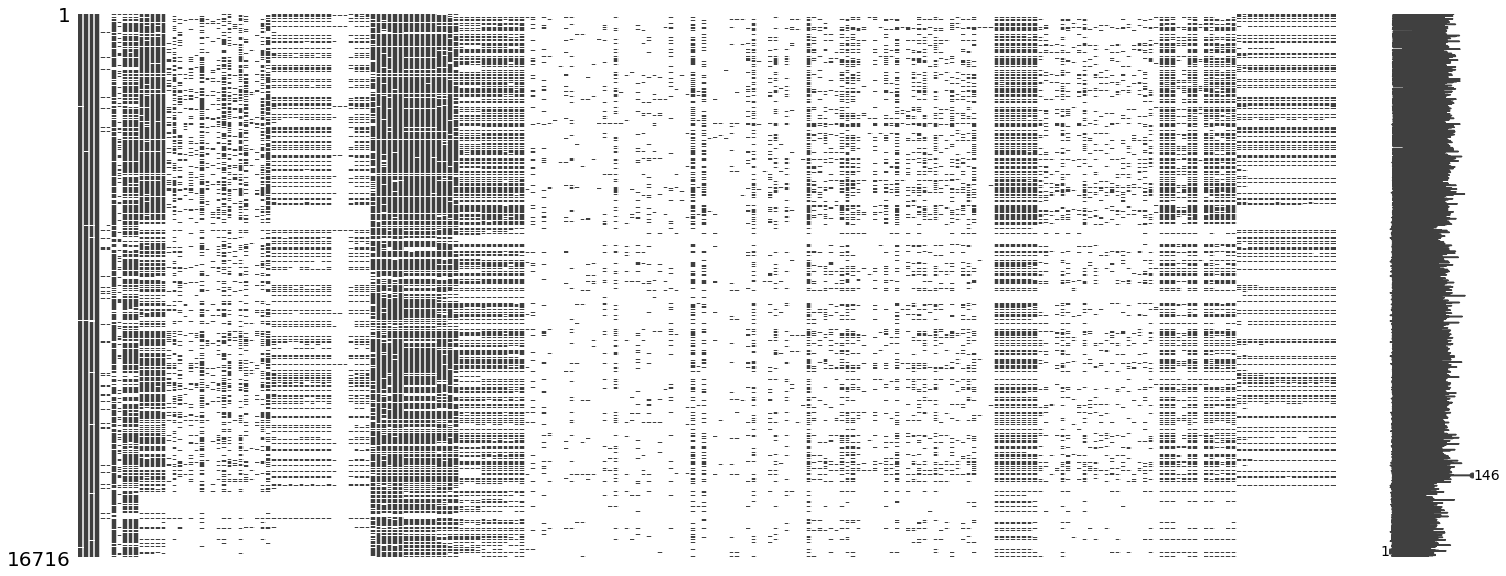

In [25]:
import missingno as msno
msno.matrix(response)

총 16,716명의 데이터와 총 290개의 질문에 무응답을 시각화해보니 무응답 데이터의 컬럼이 많은 것을 확인 할 수 있습니다.

## 성별로 나누기

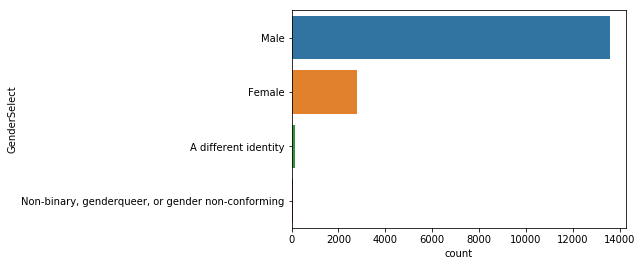

In [29]:
plt.subplot()
sns.countplot(y=response['GenderSelect'], order=response['GenderSelect'].value_counts().index)
plt.show()

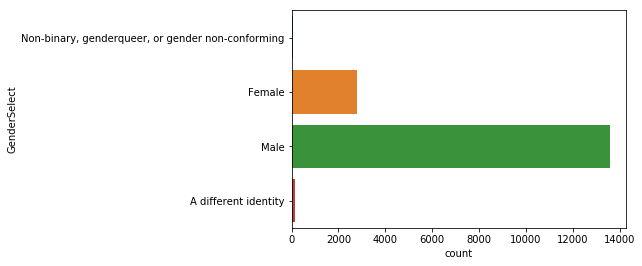

In [30]:
sns.countplot(y='GenderSelect',data=response)

여성보다는 남성의 비율이 훨씬 높은 편이다.

In [35]:
#국가별 응답수 
con_df = pd.DataFrame(response['Country'].value_counts())
con_df['국가'] = con_df.index
con_df.columns = ['응답 수','국가']
con_df = con_df.reset_index().drop('index', axis = 1)
con_df.head()

,응답 수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom


In [38]:
response['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

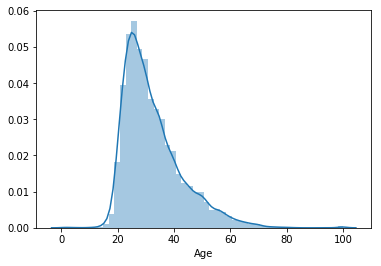

In [39]:
sns.distplot(response[response['Age'] > 0]['Age'])

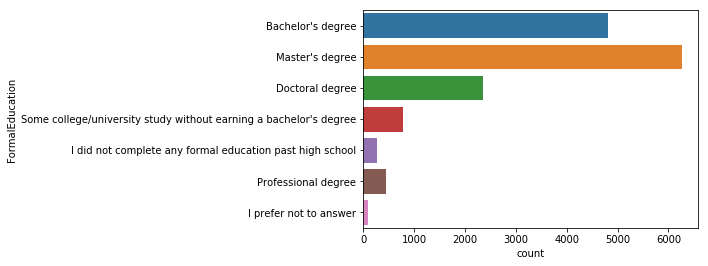

In [40]:
sns.countplot(y="FormalEducation",data= response)

학사 학위를 가진 사람보다 석사 학위를 가진 사람이 훨신 많다

In [42]:
mcq_major_count = pd.DataFrame(mcq['MajorSelect'].value_counts())
mcq_major_percent = pd.DataFrame(mcq["MajorSelect"].value_counts(normalize=True))
mcq_major_df = mcq_major_count.merge(mcq_major_percent,left_index = True, right_index=True)
mcq_major_df.columns = ['응답수','비율']
mcq_major_df

,응답수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


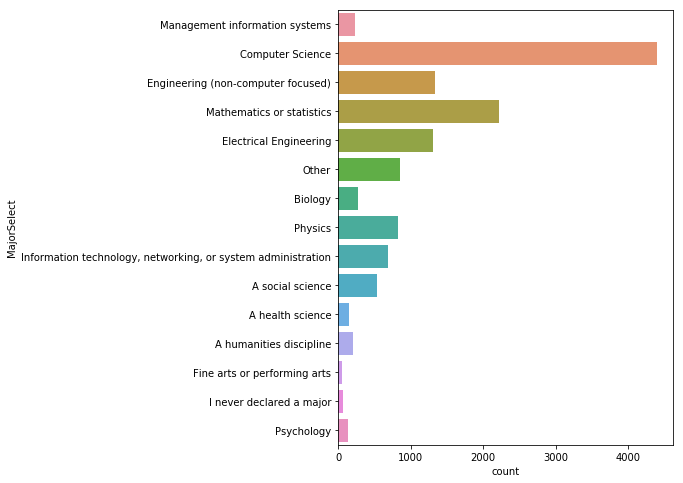

In [43]:
#재학중인 사람들의 전공 현황
plt.figure(figsize=(6,8))
sns.countplot(y="MajorSelect", data = response)

취업 여부


In [45]:
mcq_major_count = pd.DataFrame(mcq['EmploymentStatus'].value_counts())
mcq_major_percent = pd.DataFrame(mcq["EmploymentStatus"].value_counts(normalize=True))
mcq_major_df = mcq_major_count.merge(mcq_major_percent,left_index = True, right_index=True)
mcq_major_df.columns = ['응답수','비율']
mcq_major_df

,응답수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


## 프로그래밍 경험


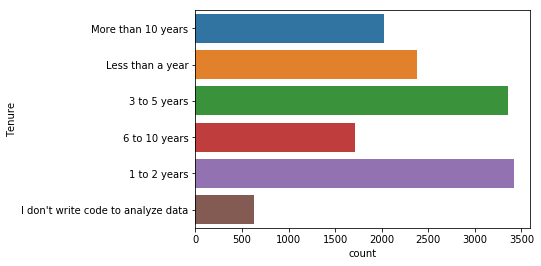

In [47]:
sns.countplot(y='Tenure', data=response)

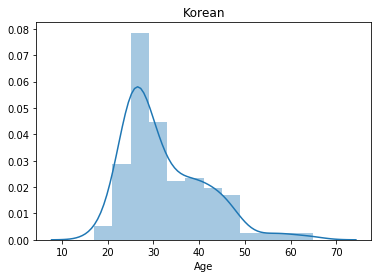

In [48]:
korea = response.loc[(response['Country']=='South Korea')]
sns.distplot(korea['Age'].dropna())
plt.title('Korean')
plt.show()

In [49]:
pd.DataFrame(korea['GenderSelect'].value_counts())

,GenderSelect
Male,156
Female,37
A different identity,1


Text(0.5,1,'Korean')

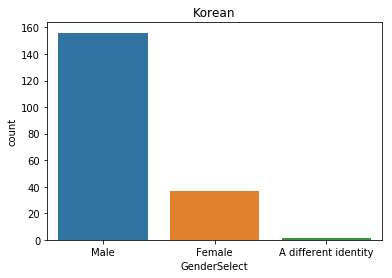

In [50]:
sns.countplot(x='GenderSelect', data=korea)
plt.title('Korean')

Text(0.5,1,'korean Male')

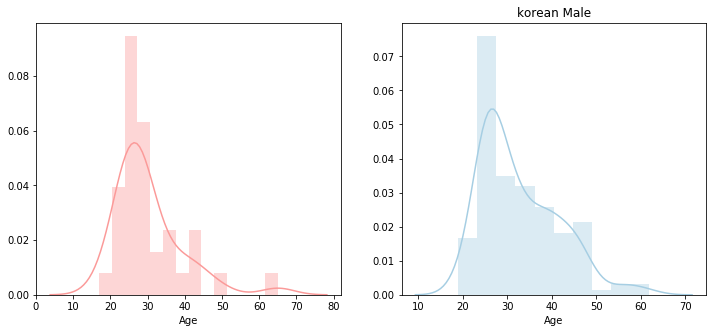

In [51]:
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Female'].dropna(),
 norm_hist=False, color=sns.color_palette("Paired")[4], ax=ax1)
plt.title('korean Female')

sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Male'].dropna(),
 norm_hist=False, color=sns.color_palette("Paired")[0], ax=ax2)
plt.title('korean Male')

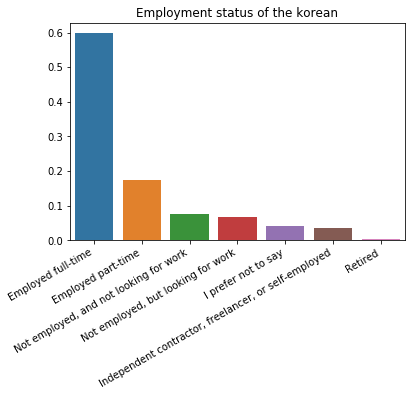

In [52]:
sns.barplot(x=korea['EmploymentStatus'].unique(), y=korea['EmploymentStatus'].value_counts()/len(korea))
plt.xticks(rotation=30, ha='right')
plt.title('Employment status of the korean')
plt.ylabel('')
plt.show()

c:\users\codeback\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


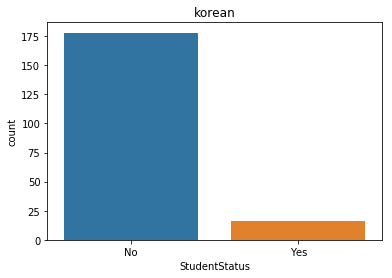

In [53]:
korea['StudentStatus'] = korea['StudentStatus'].fillna('No')
sns.countplot(x='StudentStatus', data=korea)
plt.title('korean')
plt.show()

In [54]:
korea['StudentStatus']

356       No
363       No
491       No
565       No
601       No
645       No
715       No
786      Yes
857       No
1107      No
1130     Yes
1135      No
1151      No
1193      No
1201      No
1203      No
1237      No
1307      No
1317     Yes
1347      No
1421      No
1476      No
1605      No
1628      No
1670      No
1864      No
1922     Yes
1967      No
2110      No
2128     Yes
        ... 
14654    Yes
14714     No
14772     No
14817     No
14878     No
15002     No
15007     No
15052     No
15053     No
15109     No
15126     No
15218     No
15425     No
15490     No
15565     No
15570     No
15583     No
15988     No
16015     No
16019     No
16024     No
16170     No
16195     No
16378     No
16389     No
16466     No
16540     No
16583     No
16671     No
16700     No
Name: StudentStatus, Length: 194, dtype: object